In [44]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [8]:
readfile = pd.read_csv("credit_card_data.csv")
credit_data = pd.DataFrame(readfile)

In [9]:
credit_data

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,defaulter
0,20000,2,2,-1,-1,-2,3913,3102,689,0,689,0,0,0,1
1,120000,-1,2,0,0,2,2682,1725,2682,0,1000,1000,1000,0,1
2,90000,0,0,0,0,0,29239,14027,13559,1518,1500,1000,1000,1000,0
3,50000,0,0,0,0,0,46990,48233,49291,2000,2019,1200,1100,1069,0
4,50000,-1,0,-1,0,0,8617,5670,35835,2000,36681,10000,9000,689,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,0,0,0,0,0,188948,192815,208365,8500,20000,5003,3047,5000,0
29996,150000,-1,-1,-1,-1,0,1683,1828,3502,1837,3526,8998,129,0,0
29997,30000,4,3,2,-1,0,3565,3356,2758,0,0,22000,4200,2000,1
29998,80000,1,-1,0,0,-1,-1645,78379,76304,85900,3409,1178,1926,52964,1


In [12]:
credit_data.isnull().sum()

LIMIT_BAL    0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
defaulter    0
dtype: int64

In [16]:
credit_data.corr()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,defaulter
LIMIT_BAL,1.000000,-0.271214,-0.296382,-0.286123,-0.267460,-0.235195,0.285430,0.278314,0.283236,0.195236,0.178408,0.210167,0.203242,0.217202,-0.153520
PAY_0,-0.271214,1.000000,0.672164,0.574245,0.538841,0.474553,0.187068,0.189859,0.179785,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,0.324794
PAY_2,-0.296382,0.672164,1.000000,0.766552,0.662067,0.575501,0.234887,0.235257,0.224146,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,0.263551
PAY_3,-0.286123,0.574245,0.766552,1.000000,0.777359,0.632684,0.208473,0.237295,0.227494,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,0.235253
PAY_4,-0.267460,0.538841,0.662067,0.777359,1.000000,0.716449,0.202812,0.225816,0.244983,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,0.216614
PAY_6,-0.235195,0.474553,0.575501,0.632684,0.716449,1.000000,0.207373,0.226924,0.241181,-0.001496,-0.005223,0.005834,0.019018,-0.046434,0.186866
BILL_AMT1,0.285430,0.187068,0.234887,0.208473,0.202812,0.207373,1.000000,0.951484,0.892279,0.140277,0.099355,0.156887,0.158303,0.167026,-0.019644
BILL_AMT2,0.278314,0.189859,0.235257,0.237295,0.225816,0.226924,0.951484,1.000000,0.928326,0.280365,0.100851,0.150718,0.147398,0.157957,-0.014193
BILL_AMT3,0.283236,0.179785,0.224146,0.227494,0.244983,0.241181,0.892279,0.928326,1.000000,0.244335,0.316936,0.130011,0.143405,0.179712,-0.014076
PAY_AMT1,0.195236,-0.079269,-0.080701,0.001295,-0.009362,-0.001496,0.140277,0.280365,0.244335,1.000000,0.285576,0.252191,0.199558,0.148459,-0.072929


In [46]:
X_features = credit_data.drop("defaulter", axis=1)
X_features

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,20000,2,2,-1,-1,-2,3913,3102,689,0,689,0,0,0
1,120000,-1,2,0,0,2,2682,1725,2682,0,1000,1000,1000,0
2,90000,0,0,0,0,0,29239,14027,13559,1518,1500,1000,1000,1000
3,50000,0,0,0,0,0,46990,48233,49291,2000,2019,1200,1100,1069
4,50000,-1,0,-1,0,0,8617,5670,35835,2000,36681,10000,9000,689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,0,0,0,0,0,188948,192815,208365,8500,20000,5003,3047,5000
29996,150000,-1,-1,-1,-1,0,1683,1828,3502,1837,3526,8998,129,0
29997,30000,4,3,2,-1,0,3565,3356,2758,0,0,22000,4200,2000
29998,80000,1,-1,0,0,-1,-1645,78379,76304,85900,3409,1178,1926,52964


In [20]:
y_target = credit_data["defaulter"]
y_target

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: defaulter, Length: 30000, dtype: int64

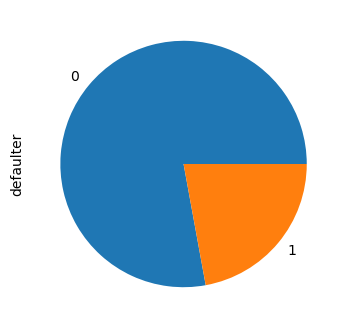

In [43]:
fig = plt.figure(figsize=(10,4))
fig.add_subplot(1,1,1)
piechart = credit_data["defaulter"].value_counts(normalize=True).plot.pie()

In [50]:
sm = SMOTE()

In [51]:
X_os, y_os = sm.fit_resample(X_features,y_target)

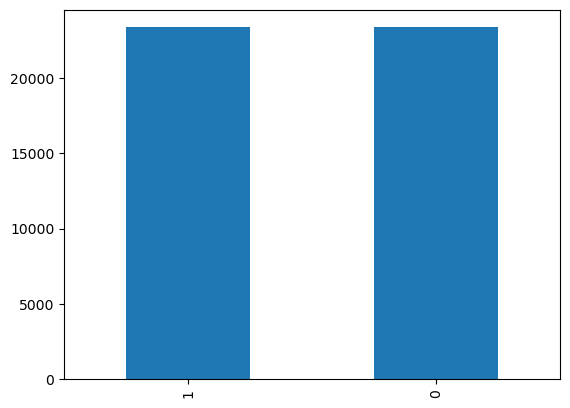

In [57]:
y_os.value_counts().plot(kind='bar')
plt.show()